In [50]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Stats test
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import FastICA

# Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

df = pd.read_csv('teams_women.csv')
print(df.shape)
df.head()

(460, 55)


,team_id,year,team,region,seed,finish,weekend,her_hoops_raw,her_hoops_id,hhs_rank,...,%pts_3pd,rbd%,drbd%,trbd%,astd%,tod%,opp_ast_to,opp_stl%,opp_blk%,opp_pf%
0,2017 Connecticut,2017,Connecticut,East,1,Final Four,3,UConn,2017 UConn,1,...,0.3040,0.3230,0.6260,0.4530,0.4840,0.2150,0.5800,0.0750,0.0650,0.2050
1,2017 Baylor,2017,Baylor,South,1,Elite Eight,2,Baylor,2017 Baylor,2,...,0.3000,0.2410,0.5330,0.3740,0.5010,0.1760,0.6500,0.0530,0.0520,0.2140
2,2017 South Carolina,2017,South Carolina,West,1,Champion,3,South Carolina,2017 South Carolina,3,...,0.2310,0.3220,0.6190,0.4560,0.4940,0.1850,0.7000,0.0700,0.0620,0.2360
3,2017 Notre Dame,2017,Notre Dame,Midwest,1,Elite Eight,2,Notre Dame,2017 Notre Dame,4,...,0.3200,0.2820,0.6340,0.4480,0.5940,0.1970,0.8600,0.0730,0.0540,0.2090
4,2017 Mississippi St.,2017,Mississippi St.,South,2,Runner Up,3,Mississippi St.,2017 Mississippi St.,5,...,0.1800,0.3020,0.5930,0.4540,0.4710,0.2400,0.5100,0.0640,0.0740,0.2520


In [51]:
df.columns

Index(['team_id', 'year', 'team', 'region', 'seed', 'finish', 'weekend',
       'her_hoops_raw', 'her_hoops_id', 'hhs_rank', 'ppg', 'opp_ppg',
       'net_ppg', 'off_rtg', 'def_rtg', 'net_rtg', 'pace', 'hhs_net_rtg',
       'hhs_off_rtg', 'hhs_def_rtg', 'rpi', 'ppp', 'ppsa', 'efg%', 'ftr',
       '3pr', '%pts_ft', '%pts_2p', '%pts_3p', 'orb%', 'drb%', 'trb%', 'ast%',
       'to%', 'ast_to', 'stl%', 'blk%', 'pf%', 'pppd', 'opp_ppsa', 'efgd%',
       'ftrd', '3prd', '%pts_ftd', '%pts_2pd', '%pts_3pd', 'rbd%', 'drbd%',
       'trbd%', 'astd%', 'tod%', 'opp_ast_to', 'opp_stl%', 'opp_blk%',
       'opp_pf%'],
      dtype='object')

In [52]:
X = df[['ppg', 'opp_ppg',
       'net_ppg', 'off_rtg', 'def_rtg', 'net_rtg', 'pace', 'hhs_net_rtg',
       'hhs_off_rtg', 'hhs_def_rtg', 'rpi', 'ppp', 'ppsa', 'efg%', 'ftr',
       '3pr', '%pts_ft', '%pts_2p', '%pts_3p', 'orb%', 'drb%', 'trb%', 'ast%',
       'to%', 'ast_to', 'stl%', 'blk%', 'pf%', 'pppd', 'opp_ppsa', 'efgd%',
       'ftrd', '3prd', '%pts_ftd', '%pts_2pd', '%pts_3pd', 'rbd%', 'drbd%',
       'trbd%', 'astd%', 'tod%', 'opp_ast_to', 'opp_stl%', 'opp_blk%',
       'opp_pf%']]
y = df['weekend']

### I. Feature Selection

In [53]:
# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,ppg,51.3089,0.0000,0.1104
1,opp_ppg,7.5324,0.0006,0.0294
2,net_ppg,105.2117,0.0000,0.1964
3,off_rtg,69.4306,0.0000,0.1298
4,def_rtg,17.5185,0.0000,0.0919
5,net_rtg,99.9777,0.0000,0.1727
6,pace,3.3474,0.0360,0.0458
7,hhs_net_rtg,176.2985,0.0000,0.3029
8,hhs_off_rtg,112.6165,0.0000,0.2277
9,hhs_def_rtg,139.2806,0.0000,0.2278


In [54]:
feature_df = stats_df[stats_df['mutual_info'] > .05]
feature_df

,feature,f_values,p_values,mutual_info
0,ppg,51.3089,0.0000,0.1104
2,net_ppg,105.2117,0.0000,0.1964
3,off_rtg,69.4306,0.0000,0.1298
4,def_rtg,17.5185,0.0000,0.0919
5,net_rtg,99.9777,0.0000,0.1727
7,hhs_net_rtg,176.2985,0.0000,0.3029
8,hhs_off_rtg,112.6165,0.0000,0.2277
9,hhs_def_rtg,139.2806,0.0000,0.2278
10,rpi,170.0163,0.0000,0.3461
11,ppp,46.3212,0.0000,0.1006


In [55]:
feature_df = feature_df[feature_df['p_values'] < .05]
feature_df.sort_values(by='f_values', ascending=False)

,feature,f_values,p_values,mutual_info
7,hhs_net_rtg,176.2985,0.0000,0.3029
10,rpi,170.0163,0.0000,0.3461
9,hhs_def_rtg,139.2806,0.0000,0.2278
8,hhs_off_rtg,112.6165,0.0000,0.2277
2,net_ppg,105.2117,0.0000,0.1964
5,net_rtg,99.9777,0.0000,0.1727
3,off_rtg,69.4306,0.0000,0.1298
21,trb%,52.1030,0.0000,0.0757
38,trbd%,52.0659,0.0000,0.0692
0,ppg,51.3089,0.0000,0.1104


In [56]:
vars_df = df[['hhs_net_rtg',
              'rpi',
              'hhs_def_rtg',
              'hhs_off_rtg',
              'net_ppg',
              'net_rtg',
              'off_rtg',
              'trb%',
              'trbd%',
              'ppg',
              'ppp',
              'ppsa',
              'pf%',
              'def_rtg'
           ]]

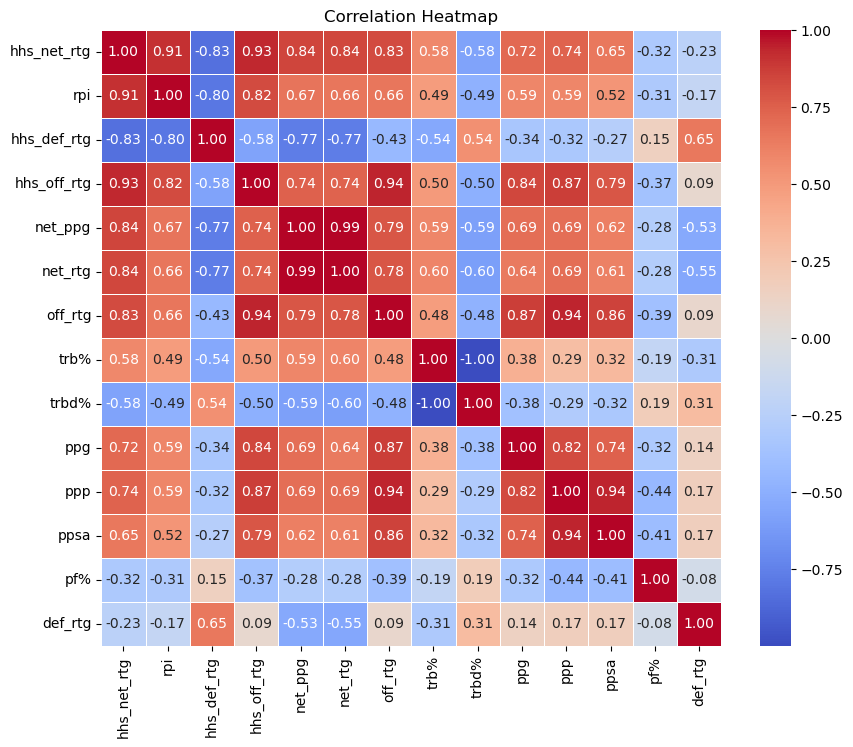

In [57]:
corr_matrix = vars_df.corr()

plt.figure(figsize=(10, 8))  # Optional: specify the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### II. Build Clustering Model

In [58]:
sc = StandardScaler()
scaled_array = sc.fit_transform(vars_df)
model_df = pd.DataFrame(scaled_array)
model_df.columns = ['hhs_net_rtg',
              'rpi',
              'hhs_def_rtg',
              'hhs_off_rtg',
              'net_ppg',
              'net_rtg',
              'off_rtg',
              'trb%',
              'trbd%',
              'ppg',
              'ppp',
              'ppsa',
              'pf%',
              'def_rtg']
model_df.head()

,hhs_net_rtg,rpi,hhs_def_rtg,hhs_off_rtg,net_ppg,net_rtg,off_rtg,trb%,trbd%,ppg,ppp,ppsa,pf%,def_rtg
0,3.2584,2.3608,-2.9596,2.8777,3.5169,3.5925,2.9498,0.6778,-0.6778,2.2695,3.0160,2.8752,-2.6416,-1.7817
1,2.7702,1.2995,-2.7503,2.2936,3.6760,3.3843,2.4412,3.2971,-3.2970,2.6243,1.6371,1.2849,-0.5464,-2.1339
2,1.9199,2.0071,-1.9320,1.5727,1.4967,1.6036,1.2453,0.5783,-0.5784,0.6725,1.1774,0.9957,-0.5464,-0.8918
3,1.8694,2.0695,-1.3991,1.8337,1.2263,1.2336,1.5614,0.8436,-0.8436,1.2344,1.4839,1.2849,-0.3559,0.1279
4,1.7936,1.7573,-1.9320,1.3863,1.3058,1.3608,0.9704,0.6447,-0.6447,0.6133,0.4114,0.1282,1.9298,-0.8732


In [59]:
wcss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = "k-means++", algorithm="lloyd",
                    max_iter = 500, n_init = 10, random_state = 123)
    kmeans.fit(model_df)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(data = go.Scatter(x = [2,3,4,5,6,7,8,9,10], y = wcss))


fig.update_layout(title='WCSS vs. Cluster number',
                   xaxis_title='Clusters',
                   yaxis_title='WCSS')
fig.show()

In [60]:
# Fit K-Means Clustering Mode
kmeans4 = KMeans(n_clusters=5, init='k-means++', algorithm='lloyd',
                 max_iter=500, random_state=123)
kmeans4.fit_predict(model_df)
df['cluster'] = kmeans4.labels_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [61]:
pd.crosstab(index=df['finish'], columns=df['cluster'])

cluster,0,1,2,3,4
finish,,,,,
Champion,0,0,7,0,0
Elite Eight,5,3,10,0,10
Final Four,0,0,10,0,4
First Round,58,53,2,78,46
Runner Up,0,1,5,0,1
Second Round,40,29,4,6,32
Sweet 16,7,16,8,0,25


In [62]:
df.to_csv('test.csv')

In [63]:
# Label Tiers
df['tier'] = ''

### S Tier ###
df.loc[(df['cluster']==2) & (df['seed']<=3) & (df['hhs_rank']<=4), 'tier'] = 'S'

### A Tier ###
df.loc[(df['cluster']==2) & (df['seed']<=3) & (df['hhs_rank']>4) & (df['hhs_rank']<=10), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['seed']<=3) & (df['hhs_rank']<=10), 'tier'] = 'A'

### B Tier ###
df.loc[(df['cluster']==4) & (df['hhs_rank']>10) & (df['hhs_rank']<=17), 'tier'] = 'B'
df.loc[(df['cluster']==0) & (df['hhs_rank']<=17), 'tier'] = 'B'
df.loc[(df['cluster']==1) & (df['hhs_rank']<=14), 'tier'] = 'B'
df.loc[(df['cluster']==4) & (df['seed']>3) & (df['hhs_rank']<=10), 'tier'] = 'A'

### C Tier ###
df.loc[(df['cluster']==2) & (df['seed']<=3) & (df['hhs_rank']>10), 'tier'] = 'C'
df.loc[(df['cluster']==2) & (df['seed']>3), 'tier'] = 'C'
df.loc[(df['cluster']==0) & (df['seed']<=6) & (df['hhs_rank']>17), 'tier'] = 'C'
df.loc[(df['cluster']==1) & (df['seed']<=6) & (df['hhs_rank']>14), 'tier'] = 'C'
df.loc[(df['cluster']==4) & (df['seed']<=6) & (df['hhs_rank']>17), 'tier'] = 'C'

### D Tier ###
df.loc[(df['cluster']==0) & (df['seed']>6) & (df['hhs_rank']>17) & (df['hhs_rank']<=50), 'tier'] = 'D'
df.loc[(df['cluster']==1) & (df['seed']>6) & (df['hhs_rank']>14) & (df['hhs_rank']<=50), 'tier'] = 'D'
df.loc[(df['cluster']==4) & (df['seed']>6) & (df['hhs_rank']>17) & (df['hhs_rank']<=50), 'tier'] = 'D'

### F Tier ###
df.loc[(df['cluster']==3), 'tier'] = 'F'
df.loc[(df['cluster']==0) & (df['hhs_rank']>50), 'tier'] = 'F'
df.loc[(df['cluster']==1) & (df['hhs_rank']>50), 'tier'] = 'F'
df.loc[(df['cluster']==4) & (df['hhs_rank']>50), 'tier'] = 'F'

In [64]:
pd.crosstab(index=df['finish'], columns=df['tier'])

tier,A,B,C,D,F,S
finish,,,,,,
Champion,0,0,0,0,0,7
Elite Eight,9,8,2,3,0,6
Final Four,5,1,0,0,0,8
First Round,1,8,13,105,110,0
Runner Up,3,1,0,0,0,3
Second Round,5,13,33,51,7,2
Sweet 16,15,16,16,7,0,2


In [65]:
df_final = df[['team_id', 'cluster', 'tier', 'finish']]
df_final.columns = ['Team', 'Cluster', 'Tier', 'Finish']
df_scaled = df[['hhs_net_rtg', 'hhs_off_rtg', 'hhs_def_rtg']]
df_scaled['hhs_def_rtg'] = 120-df_scaled['hhs_def_rtg']
scaler = MinMaxScaler(feature_range=(0, 10))
df_scaled = pd.DataFrame(np.round(scaler.fit_transform(df_scaled), 1), columns=df_scaled.columns)
df_final['Overall'] = df_scaled['hhs_net_rtg']
df_final['Offense'] = df_scaled['hhs_off_rtg']
df_final['Defense'] = df_scaled['hhs_def_rtg']
df_final.head()

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_3406/2806126528.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_3406/2806126528.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_3406/2806126528.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Team,Cluster,Tier,Finish,Overall,Offense,Defense
0,2017 Connecticut,2,S,Final Four,9.7000,10.0000,9.3000
1,2017 Baylor,2,S,Elite Eight,9.0000,9.0000,8.9000
2,2017 South Carolina,2,S,Champion,7.6000,7.7000,7.5000
3,2017 Notre Dame,2,S,Elite Eight,7.6000,8.2000,6.6000
4,2017 Mississippi St.,2,A,Runner Up,7.4000,7.4000,7.5000


In [66]:
df_final.to_csv('tiers_women.csv')